### The Law of Large Numbers

Let $Z_i$ be $N$ independent samples from some probability distribution. According to the *Law of Large Numbers*, so long as the expected value $E[Z]$ is finite, the following holds

$$ \frac{1}{N} \sum_{i=1}^{N}Z_i \rightarrow E[Z],\;\; N \rightarrow \infty $$

> The average of a sequence of random variables from the same distribution converges to the expected value of that distribution.

#### Example
-----------------

we sample `sample_size = 100000` Poisson random variables with parameter $\lambda = 4.5$. We calculate the average for the first $n$ samples, for $n = 1$ to `sample size`

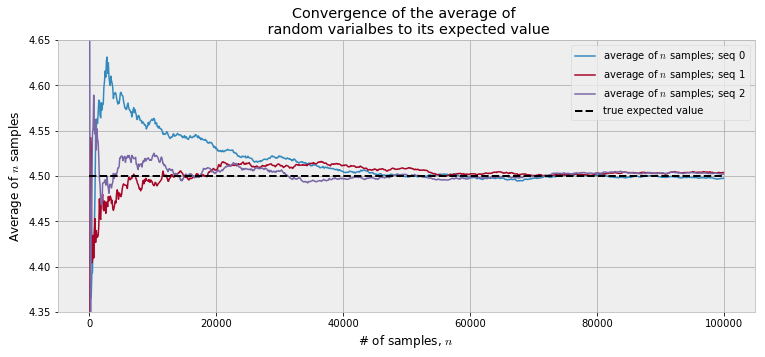

In [4]:
figsize(12.5, 5)

sample_size = 100000
expected_value = lambda_ = 4.5
poi = np.random.poisson
N_samples = range(1, sample_size, 100)

for k in range(3):
    samples = poi(lambda_, sample_size)    
    partial_average = [samples[:i].mean() for i in N_samples]    
    plt.plot(N_samples, partial_average, lw=1.5, 
             label="average of $n$ samples; seq {}".format(k))
    
plt.plot(N_samples, expected_value * np.ones_like(partial_average),
         ls="--", label="true expected value", c = "k")
plt.ylim(4.35, 4.65)
plt.title("Convergence of the average of \n random varialbes to its expected value")
plt.ylabel("Average of $n$ samples")
plt.xlabel("# of samples, $n$")
plt.legend();

How quickly am I *converging to the expected value*? For a specific $N$, let's do the above trials thousands of times and compute how far away we are from the true expected value, on average.

$$ D(N) = \sqrt{ E \Big[ \bigg( \frac{1}{N} \sum_{i=1}^N Z_i - 4.5 \bigg)^2 \Big] } $$

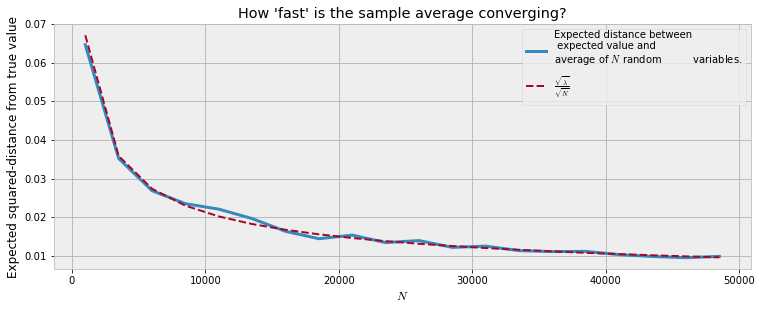

In [9]:
figsize(12.5, 4.5)

N_Y = 250
N_array = np.arange(1000, 50000, 2500)
D_N_results = np.zeros(N_array.size)

lambda_ = 4.5
expected_value = lambda_

def D_N(n):
    """ THis function approx the average variance of using n samples"""
    Z = poi(lambda_, (n, N_Y))
    average_Z = Z.mean(axis=0)
    return np.sqrt(((average_Z - expected_value)**2).mean())

for i, n in enumerate(N_array):
    D_N_results[i] = D_N(n)
    
plt.xlabel("$N$")
plt.ylabel("Expected squared-distance from true value")
plt.plot(N_array, D_N_results, lw = 3, 
         label="Expected distance between \n expected value and \naverage of $N$ random \
         variables.")
plt.plot(N_array, np.sqrt(expected_value)/np.sqrt(N_array), lw=2, ls="--", 
         label=r"$\frac{\sqrt{\lambda}}{\sqrt{N}}$")
plt.legend()
plt.title("How 'fast' is the sample average converging?");

AS expected, the expected distance between our sample average and the actual expected value shrinks as $N$ grows large. But also notice that the *rate* of convergence decreases, that is, we need only 10000 additional samples to move from 0.020 to 0.015, a difference of 0.005 but 20000 more samples to again decrease from 0.015 to 0.010.

We can measure the rate of convergence

$$ \frac{\sqrt{Var(Z)}}{\sqrt{N}} $$

This is useful to know: for a given large $N$, we know (on average) how far away we are from the estimate. On the other hand, in a Bayesian setting, this can seem like a useless result: Bayesian analysis is OK with uncertainty so what's the statistical point of adding extra precise digits? 

#### Variance

$$ \frac{1}{N} \sum_{i=1}^N (Z_i - \mu)^2 \rightarrow E[(Z - \mu)^2] = \text{Var }(Z) $$

#### Expected values and probabilities

There is an even less explicit relationship between expected value and estimating probabilities. Define the *indicator* function

$$
I_A(x) = 
\begin{cases}
  1 & x \in A \\
  0 & \text{else}
\end{cases}
$$

Then by the law of large numbers, if we have many samples $X_i$, we can estimate the probability of an event $A$, denoted $P(A)$, by:

$$
\frac{1}{N}\sum_{i=1}^N I_A(X_i) \rightarrow E[I_A(X)] = P(A)
$$


### The Disorder of Small Numbers
The Law of Large Numbers is only valid as $N$ get *infinitely* large: never truly attainable. We also should understand when the Law of Large Numbers fails. Knowing in what situations the Law fails can give us *confidence in how unconfident we should be*.

#### Example: Aggregated geographic data

Often data comes in aggregated form. For instance, data may be grouped by state, county, or city level. Of course, the population numbers vary per geographic area. If the data is average of some characteristic of each the geographic areas, we must be conscious of the Law of Large Numbers and how in can *fail* for areas with small populations.

Toy dataset to illustrate. Suppose there are 5000 counties. Population number in each state are uniformly distributed between 100 and 1500. We are interested in measuring the average height of individuals per county. unbeknownst to us, the height does not vary accross county, and each individual, regardless of the county he or she is currently living in, has the same distribution of what their height may be:

$$ \text{height } \sim \text{Normal }(150, 15)$$

We aggregate the individuals at the county level, so we have only data for *average in the county*

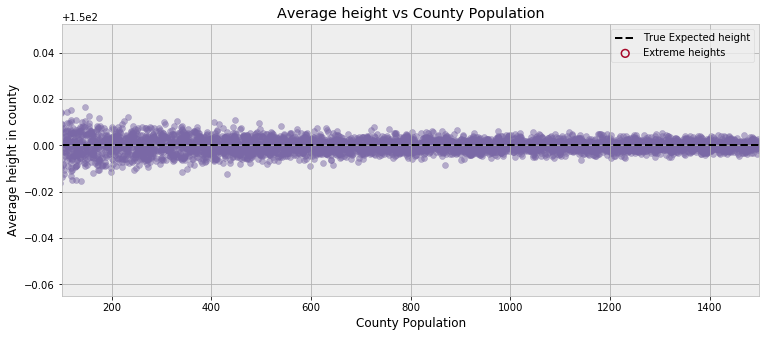

In [14]:
figsize(12.5, 5)
std_height = 15
mean_height = 150

n_counties = 5000
pop_generator = np.random.randint
norm = np.random.normal

population = pop_generator(10, 1500, n_counties)

average_across_county = np.zeros(n_counties)
for i in range(n_counties):
    average_across_county[i] = norm(mean_height, 1./std_height, population[i]).mean()
    
i_min = np.argmin(average_across_county)
i_max = np.argmax(average_across_county)

plt.scatter(population, average_across_county, alpha=.5, c="#7A68A6")
plt.scatter([population[i_min], population[i_max]], 
            [average_across_county[i_min], average_across_county[i_max]],
            s = 60, marker="o", facecolors="none", edgecolors="#A60628", lw=1.5,
            label="Extreme heights")
plt.xlim(100, 1500)
plt.title("Average height vs County Population")
plt.xlabel("County Population")
plt.ylabel("Average height in county")
plt.plot([100, 1500], [150, 150], color="k", label="True Expected height", ls="--")
plt.legend(scatterpoints=1);

#### Example: Kaggle's U.S. Census Return Rate Challenge

We plot mail-back rate versus block group population

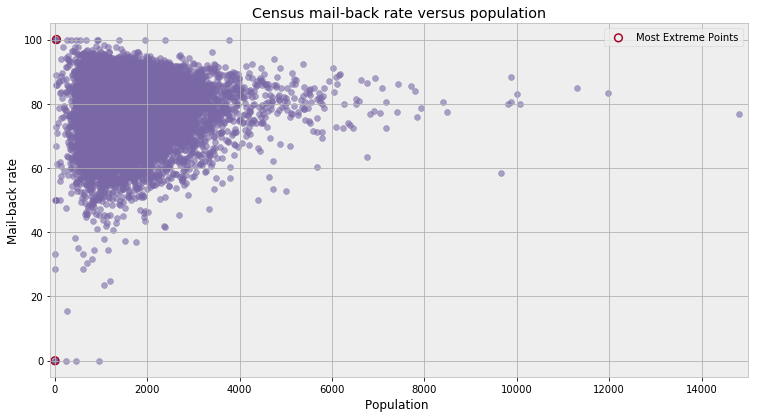

In [19]:
figsize(12.5, 6.5)

data = np.genfromtxt('./data/census_data.csv', skip_header=1, delimiter=',')
plt.scatter(data[:,1], data[:, 0], color="#7A68A6", alpha=.6)
plt.title('Census mail-back rate versus population')
plt.xlim(-100, 15e3)
plt.ylim(-5, 105)
plt.xlabel('Population ')
plt.ylabel('Mail-back rate')

i_min = np.argmin(data[:,0])
i_max = np.argmax(data[:,0])

plt.scatter([data[i_min,1], data[i_max,1]], 
            [data[i_min,0], data[i_max,0]],
            s = 60, marker='o', facecolors='none',
            edgecolors="#A60628", lw=1.5, label="Most Extreme Points")
plt.legend(scatterpoints=1);

samll datasets cannot be processed using the Law of Large Numbers. Compare with applying the Law without hassle to big datasets. Big data prediction problems are solved by relatively simple algorithms. The paradox is partially resolved by understanding that the law of Large Numbers creates solutions that are **stable**.

### Conclusion

While the Law of Large Numbers is cool, it is only true so much as its name implies: with large sample sizes only. We have seen how our inference can be affected by not considering *how the data is shaped*

1. By (cheaply) drawing many samples from the posterior distributions, we can ensure that the Law of Large Number applies as we approximate expected values
2. Bayesian inference understands that with small sample sizes, we can observe wild randomness. Our posterior distribution will reflect this by being more spread rather than tightly concentrated
3. There are major implications of not considering the sample size, and trying to sort objects that are unstable leads to pathological orderings. The method provided above solves this problem.

In [13]:
%matplotlib inline
import numpy as np
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt

from IPython.core.display import HTML
def css_styling():
    styles = open("custom.css", "r").read()
    return HTML(styles)
css_styling()